# 상관분석 Corr()

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#파일부터 불러와보자

survey = pd.read_csv('./PCA_raw2.csv')
survey

,number,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류,인지여부,입주후매출,입주후고용,입주후절감
0,0,1,1,2,4.0,3,3,2,2,2,2,3,5,1,2,2,3
1,1,1,1,2,3.0,3,2,3,2,2,2,2,3,2,3,3,3
2,2,2,2,1,2.0,3,3,3,2,2,3,3,2,2,2,3,2
3,3,1,1,2,4.0,3,2,3,3,3,2,2,3,2,3,3,2
4,4,1,1,1,5.0,3,2,3,3,3,2,2,2,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,255,1,2,4,3.0,3,4,4,3,4,3,4,3,2,2,2,3
246,256,2,1,2,3.0,3,4,3,4,4,4,4,3,1,3,3,3
247,257,1,2,2,3.0,4,4,4,4,4,4,4,3,1,4,4,4
248,258,1,1,4,5.0,4,5,5,3,3,3,5,3,2,5,5,3


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
corr = survey.corr()
print(corr)

          number      입주형태      입주기간     코로나영향    환경개선여부      정화시설      위치규모  \
number  1.000000 -0.012848  0.126587  0.117463  0.019255  0.256783  0.343651   
입주형태   -0.012848  1.000000  0.032715  0.047108 -0.044017  0.040186 -0.026028   
입주기간    0.126587  0.032715  1.000000 -0.097927 -0.007133  0.019134  0.027721   
코로나영향   0.117463  0.047108 -0.097927  1.000000 -0.033776 -0.024368 -0.073741   
환경개선여부  0.019255 -0.044017 -0.007133 -0.033776  1.000000  0.218677  0.127293   
정화시설    0.256783  0.040186  0.019134 -0.024368  0.218677  1.000000  0.297037   
위치규모    0.343651 -0.026028  0.027721 -0.073741  0.127293  0.297037  1.000000   
비용      0.253655  0.099399 -0.017639  0.051645  0.124580  0.318656  0.402113   
환경      0.306405 -0.118242  0.040068 -0.101090  0.203276  0.313111  0.440839   
인력      0.341253 -0.046736  0.040945  0.042129  0.251148  0.336785  0.432607   
행정      0.340077 -0.041971  0.082782  0.001811  0.167493  0.321611  0.295882   
시설      0.308524 -0.006229  0.036346  0.

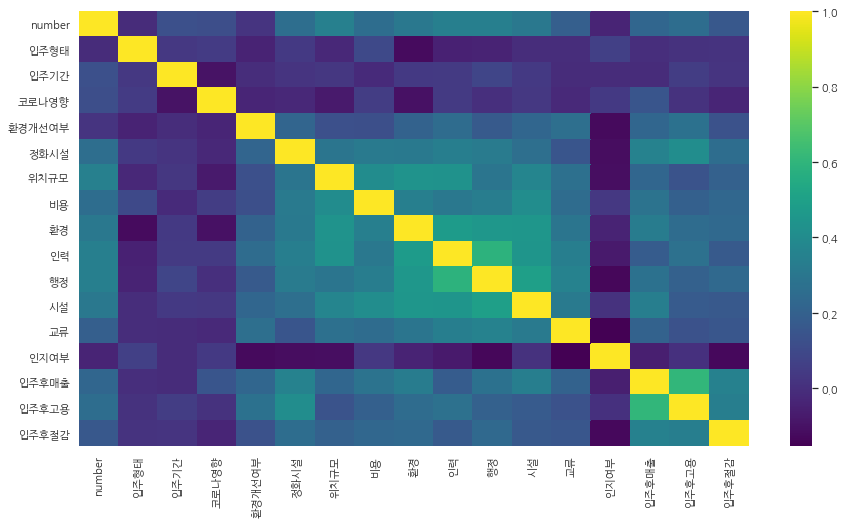

In [7]:
sns.set(rc={'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(corr, cmap='viridis')
plt.show()

In [8]:
import matplotlib

In [10]:
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
 
df = pd.read_csv('./PCA_raw2.csv') ## 데이터 불러오기

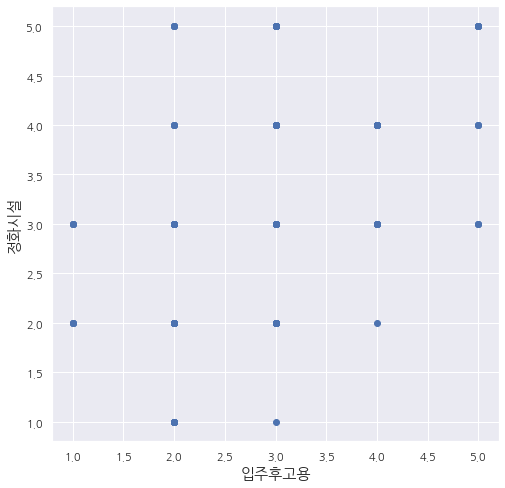

In [12]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['입주후고용'],df['정화시설']) ## 원 데이터 산포도
 
plt.xlabel('입주후고용', fontsize=font_size)
plt.ylabel('정화시설',fontsize=font_size)
plt.show()

# 회귀분석 Fit()

In [13]:
## states model 사용
fit = ols('정화시설 ~ 입주후고용',data=df).fit() ## 단순선형회귀모형 적합
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   정화시설   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     49.44
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.98e-11
Time:                        08:54:42   Log-Likelihood:                -328.61
No. Observations:                 250   AIC:                             661.2
Df Residuals:                     248   BIC:                             668.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5640      0.198      7.904      0.000       1.174       1.954
입주후고용          0.4840      0.069      7.031      0.000       0.348       0.620
==============================================================================
Omnibus:                       12.410   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.253
Skew:                           0.564   Prob(JB):                      0.00132
Kurtosis:                       3.016   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""